In [ ]:
!pip install matplotlib numpy

In [29]:
from matplotlib import pyplot as plt
import numpy as np
import math
import pymongo
from datetime import date, timedelta, datetime

SMALL_SIZE = 9
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
print(myclient.list_database_names())

['admin', 'config', 'local', 'seircast']


In [78]:
def accumu(lis):
    total = 0
    for x in lis:
        if x is None:
            x=0.0
        total += x
        yield total

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


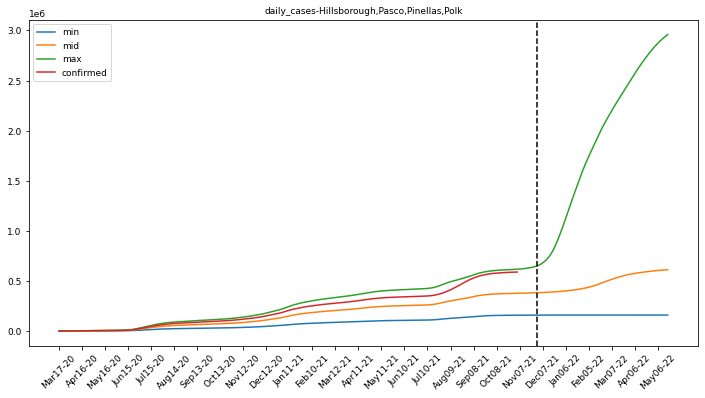

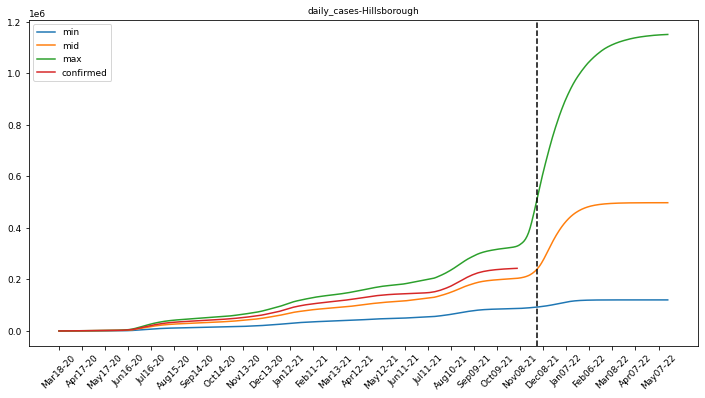

In [80]:
mydb = myclient["seircast"]
mycol = mydb["fl-counties-1122-2021"]
mydoc = mycol.find({"State":"Florida"})

now = datetime.now() # current date and time
current_date = now.strftime("%b%d-%y")

label="daily_cases"
location="Hillsborough"
print(size(mydoc))
for x in mydoc:
    confirmed=x["Confirmed"]
    #deaths=x["Deaths"]
    if location in x["Locations"]:
        #location =x["Locations"]
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        min_data = list(accumu(min_data))
        mid_data = list(accumu(mid_data))
        max_data = list(accumu(max_data))
        #deaths = list(accumu(deaths))

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")
        ax2.plot(days[:len(confirmed)], confirmed, label="confirmed")
        #ax2.plot(days[:len(deaths)], deaths, label="deaths")

        ax2.set_title(label+'-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


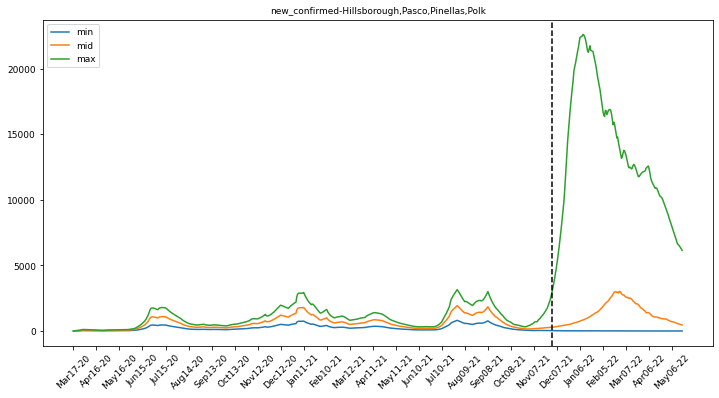

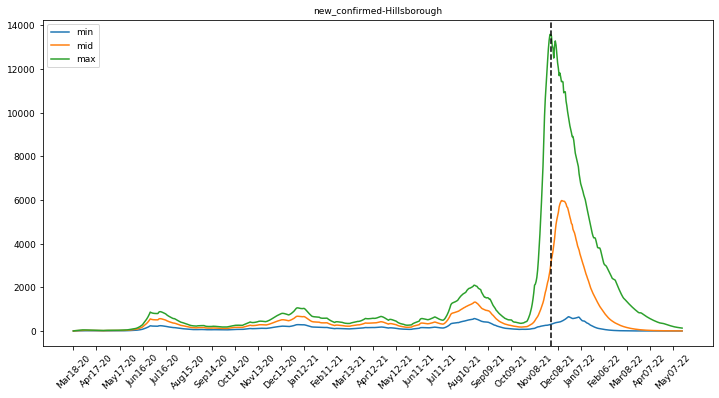

In [82]:
label="new_confirmed"
location="Hillsborough"
mydoc = mycol.find({"State":"Florida"})
print(size(mydoc))
for x in mydoc:
     if location in x["Locations"]:
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")

        ax2.set_title(label+'-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


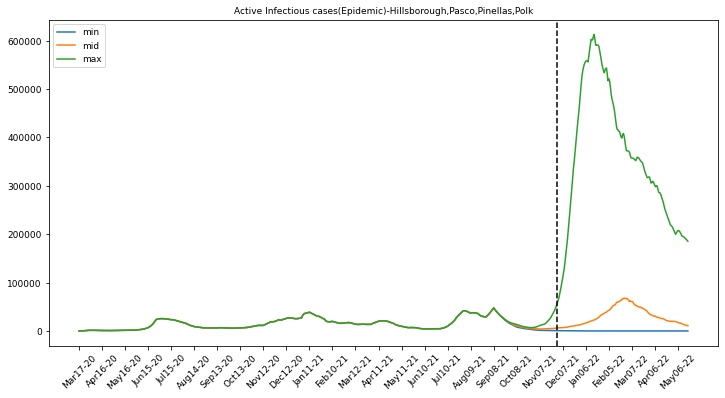

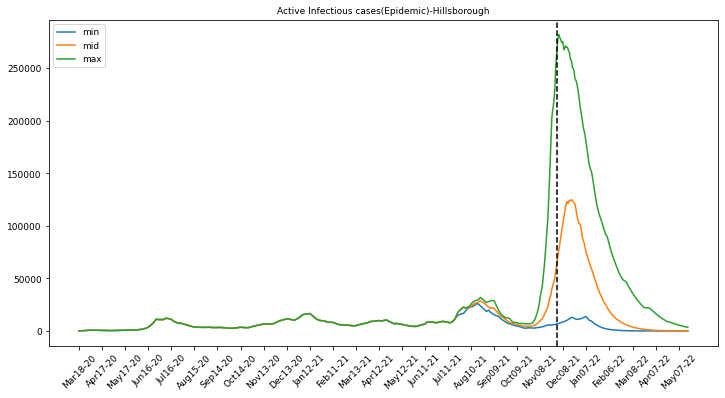

In [86]:
label="Epidemic" # same as ... active infectious cases?
location="Hillsborough"
mydoc = mycol.find({"State":"Florida"})
print(size(mydoc))
for x in mydoc:
     if location in x["Locations"]:
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")

        ax2.set_title("Active Infectious cases("+label+')-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


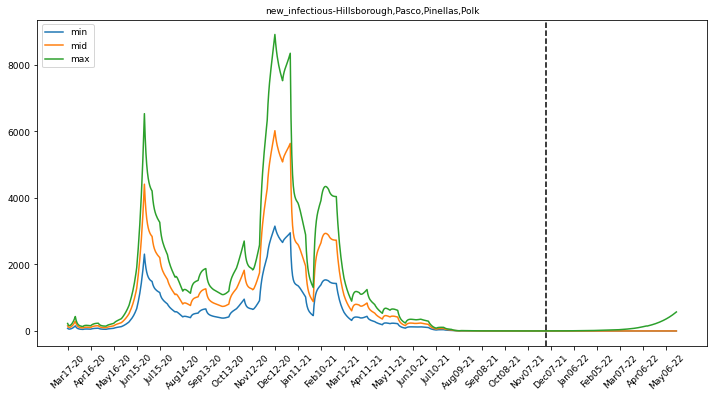

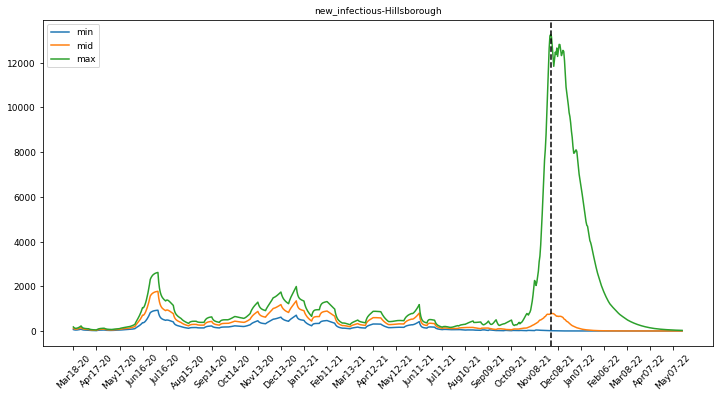

In [87]:
label="new_infectious"
location="Hillsborough"
mydoc = mycol.find({"State":"Florida"})
print(size(mydoc))
for x in mydoc:
     if location in x["Locations"]:
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")

        ax2.set_title(label+'-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


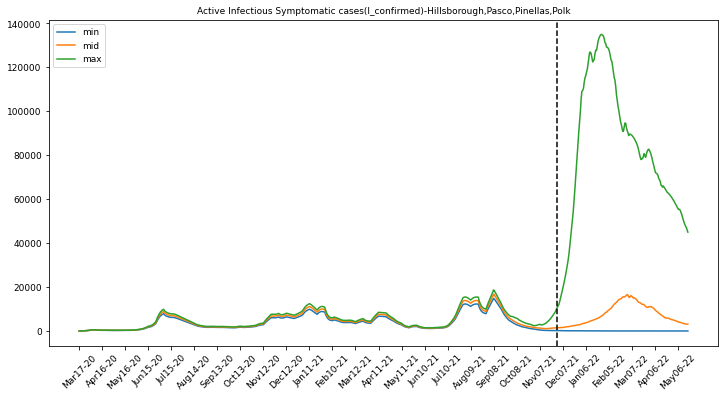

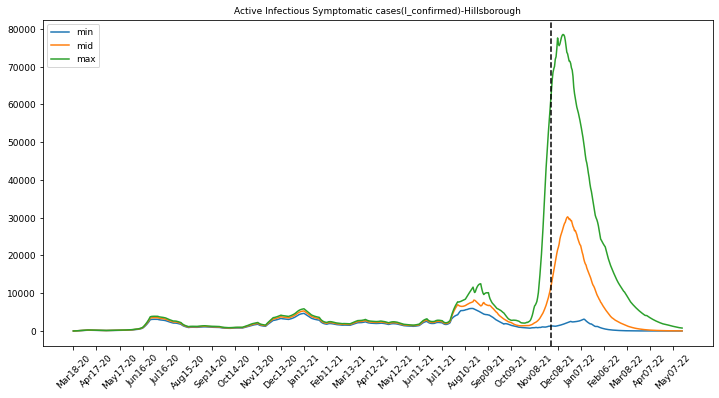

In [88]:
label="I_confirmed" # same as "Active Infectious Symptomatic cases"
location="Hillsborough"
mydoc = mycol.find({"State":"Florida"})
print(size(mydoc))
for x in mydoc:
     if location in x["Locations"]:
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")

        ax2.set_title("Active Infectious Symptomatic cases("+label+')-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


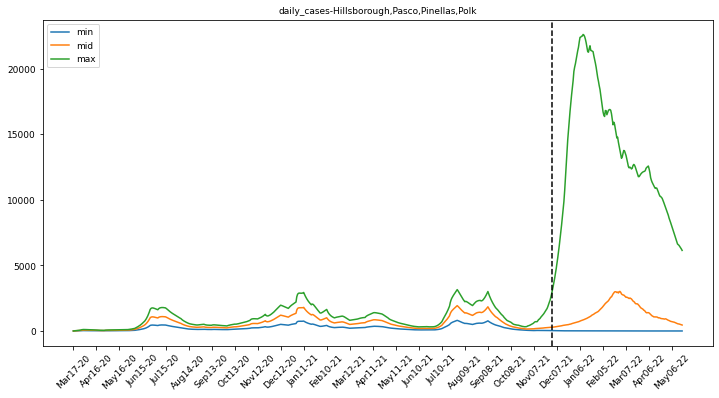

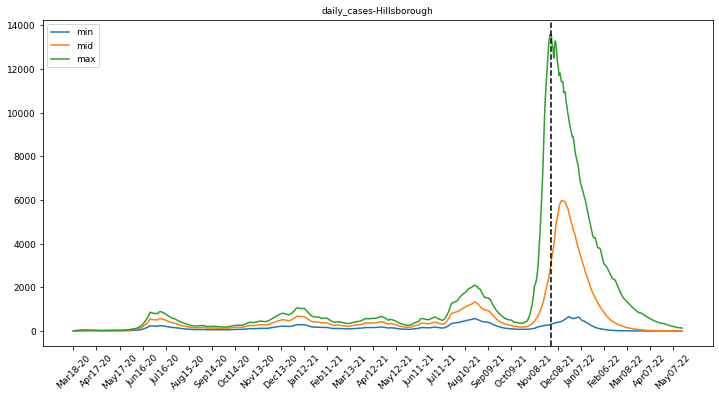

In [89]:
label="daily_cases" # same as "Active Infectious Symptomatic cases"
location="Hillsborough"
mydoc = mycol.find({"State":"Florida"})
print(size(mydoc))
for x in mydoc:
     if location in x["Locations"]:
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")

        ax2.set_title(label+'-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


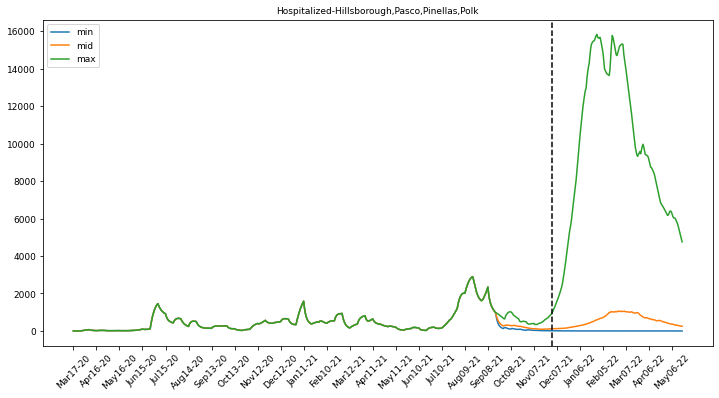

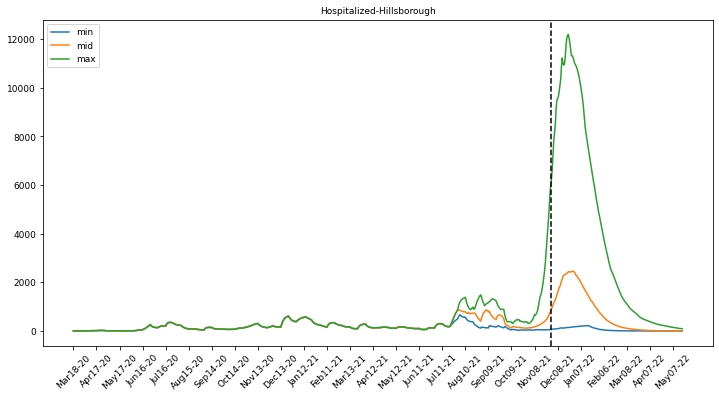

In [91]:
label="Hospitalized"
location="Hillsborough"
mydoc = mycol.find({"State":"Florida"})
print(size(mydoc))
for x in mydoc:
     if location in x["Locations"]:
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")

        ax2.set_title(label+'-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner

1
data length 794
Hillsborough,Pasco,Pinellas,Polk 18-Mar-2020
data length 793
Hillsborough 17-Mar-2020


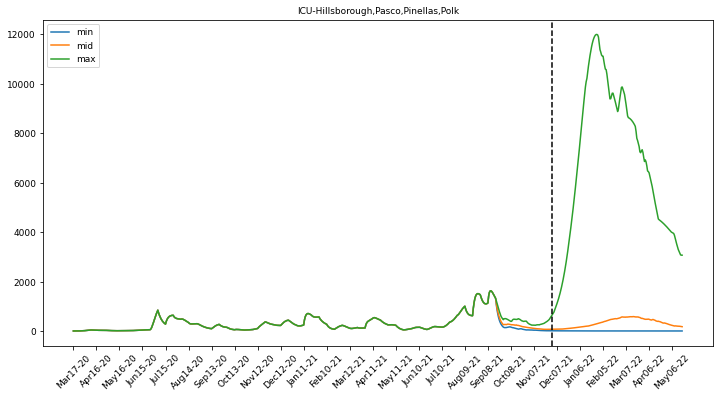

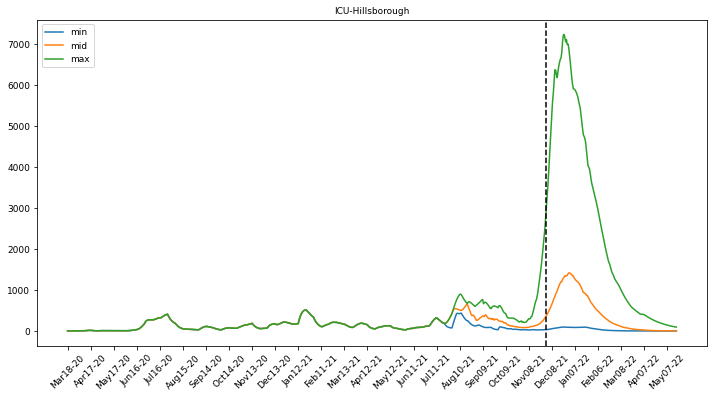

In [92]:
label="ICU"
location="Hillsborough"
mydoc = mycol.find({"State":"Florida"})
print(size(mydoc))
for x in mydoc:
     if location in x["Locations"]:
        data=x[label]
        if data is None:
            print("Error: empty data")
            break
        else:
            print('data length',len(data))
        
        print(x["Locations"], start_date)

        min_data=[]
        mid_data=[]
        max_data=[]
        for h in range(len(data)):
            min_data.append(data[h][0])
            mid_data.append(data[h][1])
            max_data.append(data[h][2])

        start_date=x["start_date"]
        sdate_obj = datetime.strptime(start_date, "%d-%b-%Y")
        days=[]
        for d in range(len(data)):
            dd = sdate_obj+timedelta(days=d)
            #dd = dd.strftime("%d-%b-%Y") # 17-Mar-2020
            #dd = dd.strftime("%m%d-%y") # 0317-20
            dd = dd.strftime("%b%d-%y") # 0317-20
            days.append(dd)
            #print(dd)

        fig2, ax2 = plt.subplots(figsize=(12,6))

        ax2.plot(days, min_data, label="min")
        ax2.plot(days, mid_data, label="mid")
        ax2.plot(days, max_data, label="max")

        ax2.set_title(label+'-'+x["Locations"])
        plt.axvline(x=current_date, color='k', linestyle='--') # draw vertical line on current date
        plt.xticks(np.arange(0, len(days)+1, 30))
        plt.xticks(rotation=45)
        ax2.legend(loc=2); # upper left corner